In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
norm_data = pd.read_csv('merged_norm.csv', header = None)

In [12]:
# some numbers are stored as strings, this converts them to numbers
def str_to_float(L):
    return [float(ele) for ele in L]

def str_to_int(L):
    return [int(ele) for ele in L]



In [13]:
from sklearn.model_selection import train_test_split
# extract target values
genres = np.asarray(norm_data[:][3])

# convert genres to numbers for kNN
dict_genres = {'Hip-Hop': 0, 'Pop': 1, 'Folk': 2, 'Experimental': 3, 'Rock':4, 'International':5, 'Electronic':6, 'Instrumental':7}
genres = np.asarray([dict_genres[genre] for genre in genres])
num_features = len(genres)

# extract features and convert them as an array of numbers
all_features = np.asarray(norm_data)
str_features = all_features[:, 4:]
features = np.asarray([str_to_float(feature) for feature in str_features])

print(features.shape)

(7989, 516)


In [14]:
# this function normzalizes every column of an nd array
def normalize(array):
    norm_array = []
    for i in range(len(array[0])):
        max_value = max(array[:, i])
        norm_row = []
        for j in range(len(array)):
            norm_row.append(array[j][i]/max_value)
        norm_array.append(norm_row)
        
    return np.asarray(norm_array).transpose()

features = normalize(features)


In [5]:
print(type(features))

<class 'numpy.ndarray'>


In [15]:
from sklearn.model_selection import train_test_split
# split into training and test
feat_training, feat_test, genre_training, genre_test = train_test_split(features, genres, test_size=0.1)

# split into training and validation
feat_train, feat_val, genre_train, genre_val  = train_test_split(feat_training, genre_training, test_size = 0.5)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


def k_neighbours(x_train, x_test, y_train, y_test, k):
    knn = KNeighborsClassifier(k, weights = 'distance')
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    return accuracy_score(y_test, y_predicted), confusion_matrix(y_test, y_predicted)

accuracies = [k_neighbours(feat_train, feat_val, genre_train, genre_val, i)[0] for i in range(1, 20)]
k = [k for k in range(1, 20)]


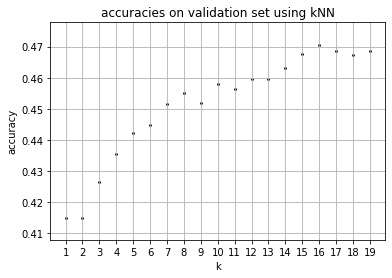

In [17]:
plt.scatter(k, accuracies, alpha = 1, s = 3, color = 'black')
plt.grid()
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracies on validation set using kNN')
plt.show()

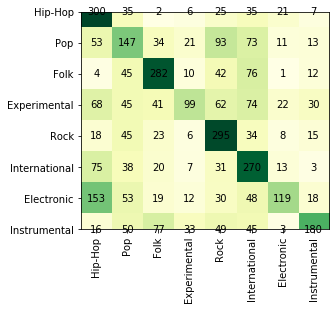

In [21]:
sixteen_nn_confusion = k_neighbours(feat_train, feat_val, genre_train, genre_val, 16)[1]

fig1, ax1= plt.subplots(1)
ax1.imshow(sixteen_nn_confusion, interpolation ='none', cmap = 'YlGn')
for (j,i),label in np.ndenumerate(sixteen_nn_confusion):
    ax1.text(i,j,label,ha='center',va='center', color = 'black')


plt.xticks([0,1,2,3,4,5,6,7],['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electronic', 'Instrumental'], rotation = 'vertical')
plt.yticks([0,1,2,3,4,5,6,7],['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electronic', 'Instrumental'])

plt.show()
